# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        weather_response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kamina
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | aykhal
Processing Record 6 of Set 1 | punta del este
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | usinsk
Processing Record 10 of Set 1 | hovd
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | grytviken
Processing Rec

Processing Record 36 of Set 4 | dunedin
Processing Record 37 of Set 4 | college
Processing Record 38 of Set 4 | huanggang
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | tagiura
Processing Record 42 of Set 4 | aurora
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | mamuju
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | salym
Processing Record 49 of Set 4 | hadibu
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | oranjemund
Processing Record 2 of Set 5 | coruripe
Processing Record 3 of Set 5 | aksu
Processing Record 4 of Set 5 | kyshtovka
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | ribeira brava
Processing Record 7 of Set 5 | pisco
Processing Record 8 of Set 5 | colonia
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 

Processing Record 29 of Set 8 | adelaide
Processing Record 30 of Set 8 | taman rajawali
City not found. Skipping...
Processing Record 31 of Set 8 | ulan bator
Processing Record 32 of Set 8 | tabora
Processing Record 33 of Set 8 | praya
Processing Record 34 of Set 8 | betio village
Processing Record 35 of Set 8 | inirida
Processing Record 36 of Set 8 | teshi old town
Processing Record 37 of Set 8 | havre
Processing Record 38 of Set 8 | juan griego
Processing Record 39 of Set 8 | cabo san lucas
Processing Record 40 of Set 8 | jolo
Processing Record 41 of Set 8 | xinzhou
Processing Record 42 of Set 8 | dongcun
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | happy valley-goose bay
Processing Record 45 of Set 8 | sitka
Processing Record 46 of Set 8 | koh kong
Processing Record 47 of Set 8 | luino
Processing Record 48 of Set 8 | abashiri
Processing Record 49 of Set 8 | kosong
Processing Record 0 of Set 9 | suva
Processing Record 1 of Set 9 | kulhudhuffushi
Processing R

Processing Record 15 of Set 12 | nemuro
Processing Record 16 of Set 12 | souillac
Processing Record 17 of Set 12 | xinguara
City not found. Skipping...
Processing Record 18 of Set 12 | pueblo nuevo
Processing Record 19 of Set 12 | santiago
Processing Record 20 of Set 12 | fort mcmurray
-----------------------------
Data Retrieval Complete      
-----------------------------


In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
count = city_data_df.count()
count

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,277.72,86,74,13.27,TF,1699417571
1,kamina,-8.7386,24.9906,290.73,93,100,0.60,CD,1699417572
2,port elizabeth,-33.9180,25.5701,288.88,77,0,3.60,ZA,1699417572
3,puerto baquerizo moreno,-0.9000,-89.6000,297.27,75,62,4.42,EC,1699417573
4,aykhal,66.0000,111.5000,255.65,93,31,2.03,RU,1699417573


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,277.72,86,74,13.27,TF,1699417571
1,kamina,-8.7386,24.9906,290.73,93,100,0.60,CD,1699417572
2,port elizabeth,-33.9180,25.5701,288.88,77,0,3.60,ZA,1699417572
3,puerto baquerizo moreno,-0.9000,-89.6000,297.27,75,62,4.42,EC,1699417573
4,aykhal,66.0000,111.5000,255.65,93,31,2.03,RU,1699417573


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

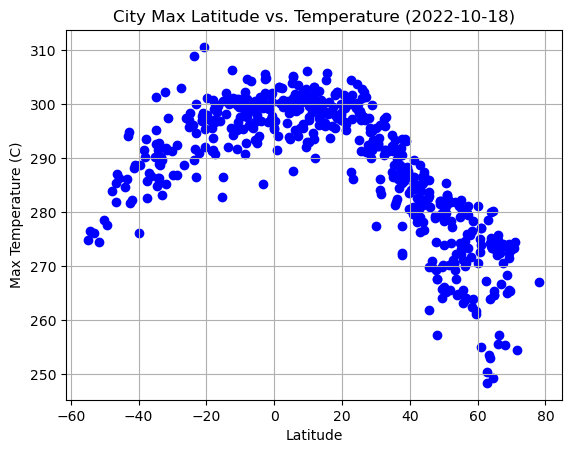

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

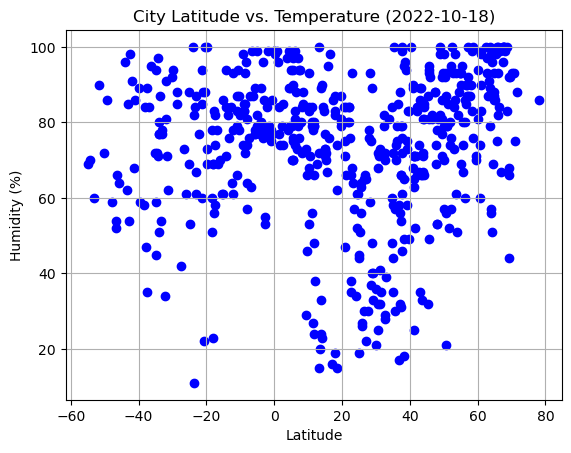

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue")
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Incorporate the other graph properties
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

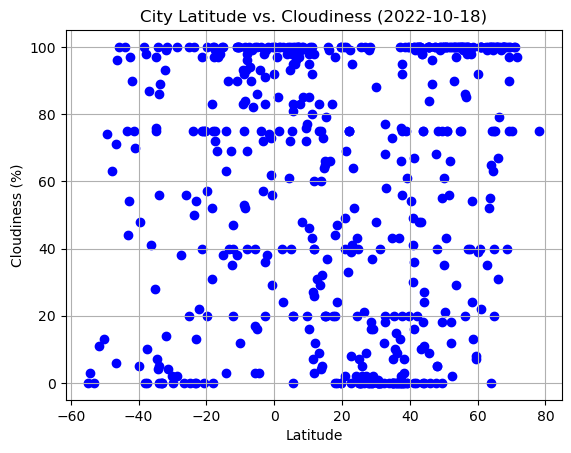

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

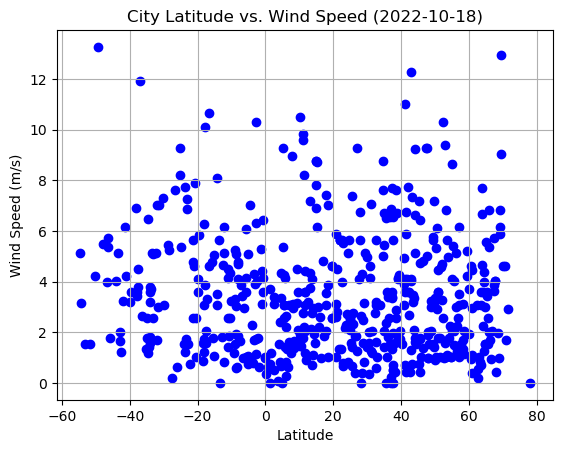

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Incorporate the other graph properties
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,aykhal,66.0000,111.5000,255.65,93,31,2.03,RU,1699417573
7,usinsk,65.9939,57.5281,274.86,100,100,5.36,RU,1699417575
8,hovd,48.0056,91.6419,267.66,53,5,0.97,MN,1699417576
9,ilulissat,69.2167,-51.1000,274.16,44,75,6.17,GL,1699417576
12,lihue,21.9789,-159.3672,300.73,80,75,5.66,US,1699417578


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,277.72,86,74,13.27,TF,1699417571
1,kamina,-8.7386,24.9906,290.73,93,100,0.60,CD,1699417572
2,port elizabeth,-33.9180,25.5701,288.88,77,0,3.60,ZA,1699417572
3,puerto baquerizo moreno,-0.9000,-89.6000,297.27,75,62,4.42,EC,1699417573
5,punta del este,-34.9667,-54.9500,295.21,94,75,2.57,UY,1699417574


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


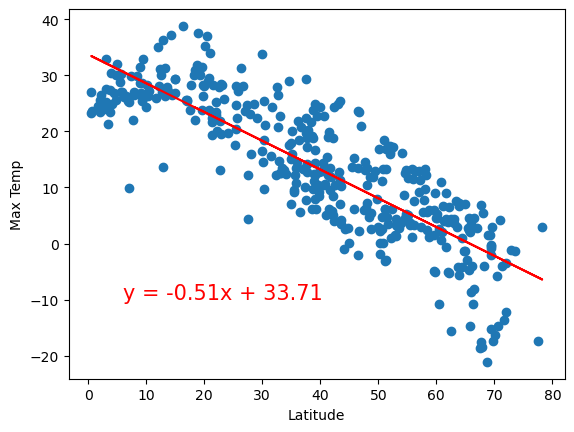

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


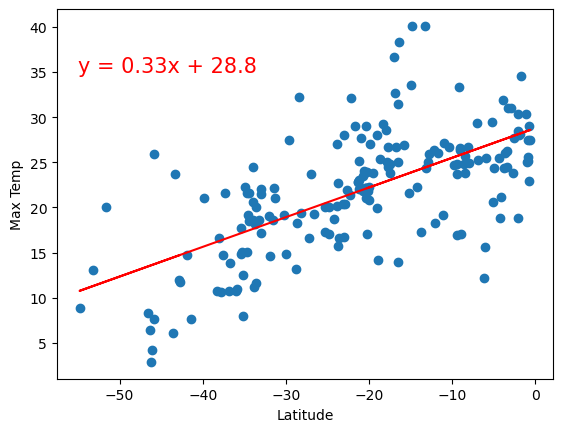

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


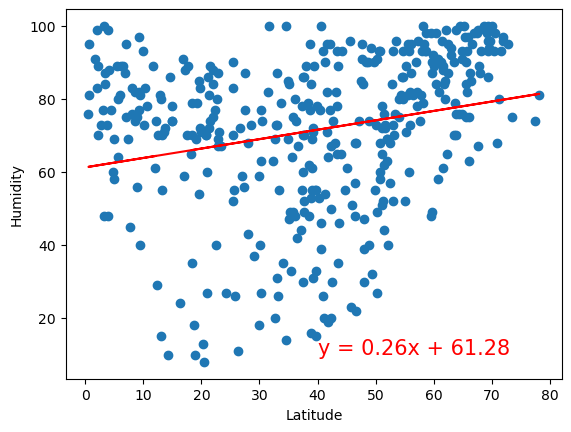

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


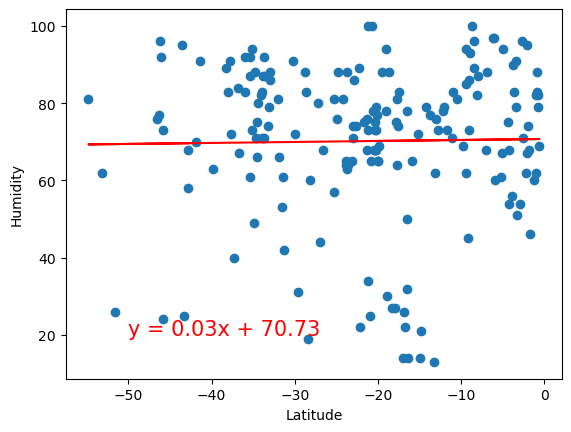

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


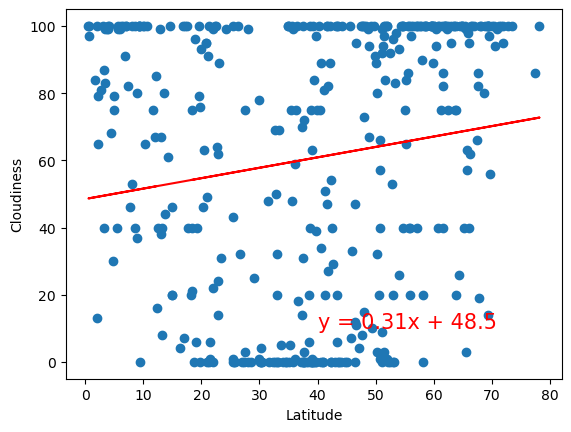

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


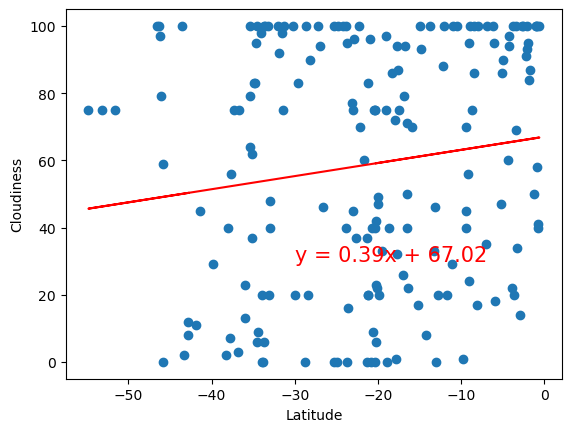

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


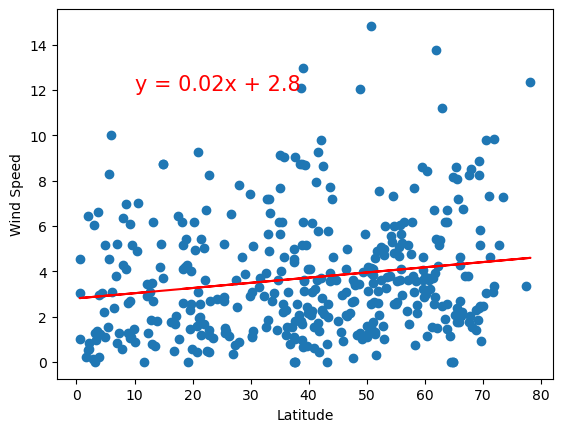

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


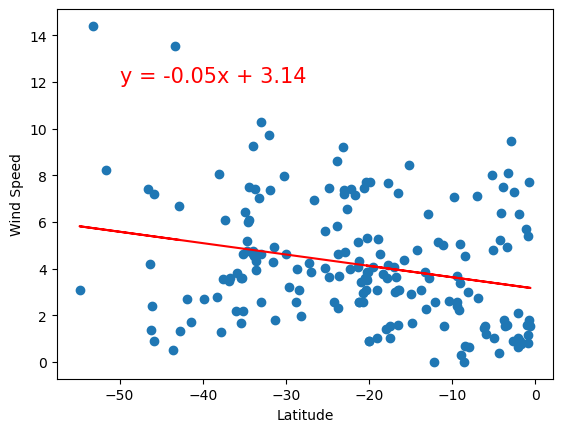

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE